In [10]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt

In [11]:
south_country = [
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela"
]

north_country = [
    "Antigua and Barbuda",
    "Bahamas",
    "Barbados",
    "Belize",
    "Canada",
    "Costa Rica",
    "Cuba",
    "Dominica",
    "Dominican Republic",
    "El Salvador",
    "Grenada",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Panama",
    "St. Kitts and Nevis",
    "St. Lucia",
    "St. Vincent and the Grenadines",
    "Trinidad and Tobago",
    "United States"
]

gdp = pd.read_csv("data/gdppercapita.csv").set_index("country")
south_country_gdp = gdp["2010"][south_country].to_numpy()
north_country_gdp = gdp["2010"][north_country].to_numpy()

north_country_no_us_ca = north_country[:]
north_country_no_us_ca.remove("United States")
north_country_no_us_ca.remove("Canada")
north_country_gdp_no_us_ca = gdp["2010"][north_country_no_us_ca].to_numpy()

## Null hypothesis
The GDP per capita in South American countries equals to the GDP per capita in the north American countries in \[mean median std\] in 2010.

In [12]:
def south_north_gdp(south_country_gdp, north_country_gdp, stat):
    n1 = len(south_country_gdp)
    n2 = len(north_country_gdp)
    combined = np.concatenate([south_country_gdp, north_country_gdp])
    n = len(combined)

    diff = stat(south_country_gdp) - stat(north_country_gdp)
    print(diff)

    idx = np.arange(n)
    sim_d = []
    for i in range(10000):
        np.random.shuffle(idx)
        d = stat(combined[idx][:n1]) - stat(combined[idx][n1:])
        sim_d.append(d)

    count1 = (np.abs(sim_d) >= np.abs(diff)).sum()
    count2 = (np.abs(sim_d) <= -np.abs(diff)).sum()
    count = count1 + count2
    print("Count: ", count, " out of ", 10000)
    p_val = np.round((count + 1) / (1 + 10000), 3)
    print("Two-sided test p-value: ", p_val)

    plt.hist(sim_d, 20, alpha=0.5, label="Distribution of the Test Statistic")
    plt.plot([diff, diff], [0, 1200], "b--", label="Original Stat")
    plt.plot([-diff, -diff], [0, 1200], "b--", label="Original Stat")
    plt.xlabel("Test Statistic")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.title(stat.__name__)
    plt.show()

#### Mean

-2813.550724637682
Count:  4688  out of  10000
Two-sided test p-value:  0.469


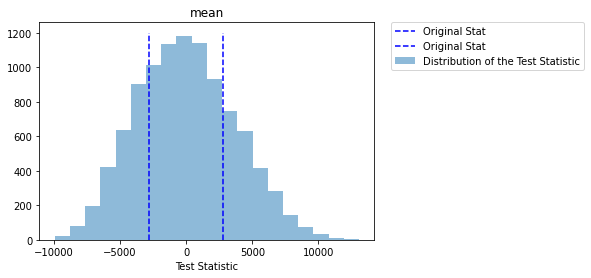

In [13]:
south_north_gdp(south_country_gdp, north_country_gdp, np.mean)

#### Mean (Without US, CA)

4.047619047618355
Count:  9981  out of  10000
Two-sided test p-value:  0.998


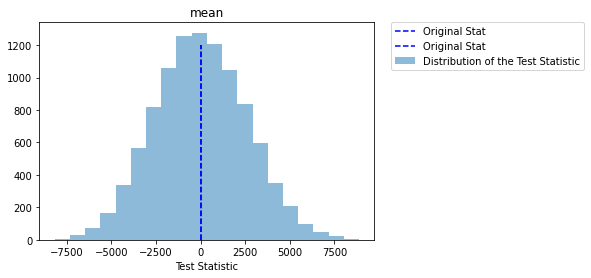

In [14]:
south_north_gdp(south_country_gdp, north_country_gdp_no_us_ca, np.mean)

#### Median

1150.0
Count:  7484  out of  10000
Two-sided test p-value:  0.748


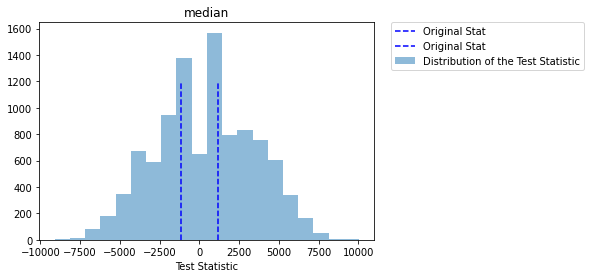

In [15]:
south_north_gdp(south_country_gdp, north_country_gdp, np.median)

#### Median (Without US, CA)

1550.0
Count:  5018  out of  10000
Two-sided test p-value:  0.502


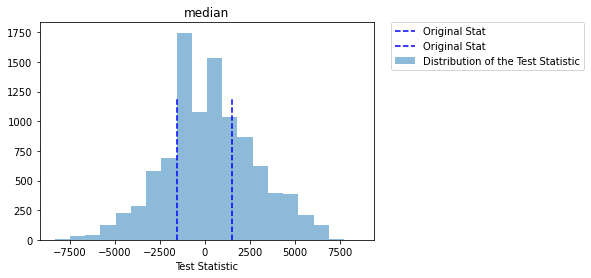

In [16]:
south_north_gdp(south_country_gdp, north_country_gdp_no_us_ca, np.median)

#### Std

-7315.508928737411
Count:  600  out of  10000
Two-sided test p-value:  0.06


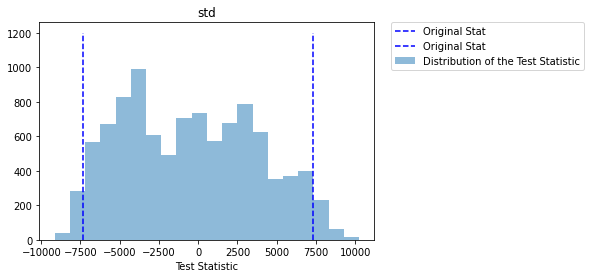

In [17]:
south_north_gdp(south_country_gdp, north_country_gdp, np.std)

#### Std (Without US, CA)

-3321.0969106043412
Count:  1340  out of  10000
Two-sided test p-value:  0.134


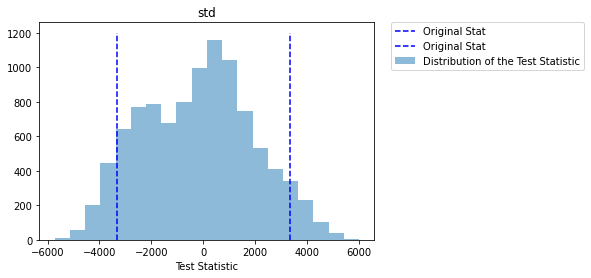

In [18]:
south_north_gdp(south_country_gdp, north_country_gdp_no_us_ca, np.std)